Name: Berkay Yıldız

ID: 201104087 

Course: Bil470

## Importing the Dependincies

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lr import LinearRegression
from tabulate import tabulate
from sklearn.model_selection import learning_curve

# Exploratory Data Analysis (EDA) for 500 Person Gender-Height-Weight-Body Mass Index

In [2]:
data = pd.read_csv('Index.csv')
data_visual = pd.read_csv('Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [4]:
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [5]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


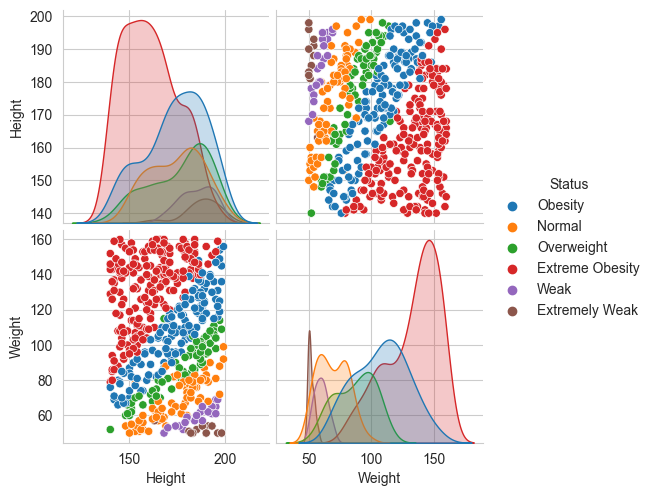

In [63]:
exclude_datas = ["gender_lbl","Index"]
subset_data = data_visual.drop(exclude_datas, axis=1)
sns.pairplot(subset_data, diag_kind='kde', hue='Status')
plt.show()

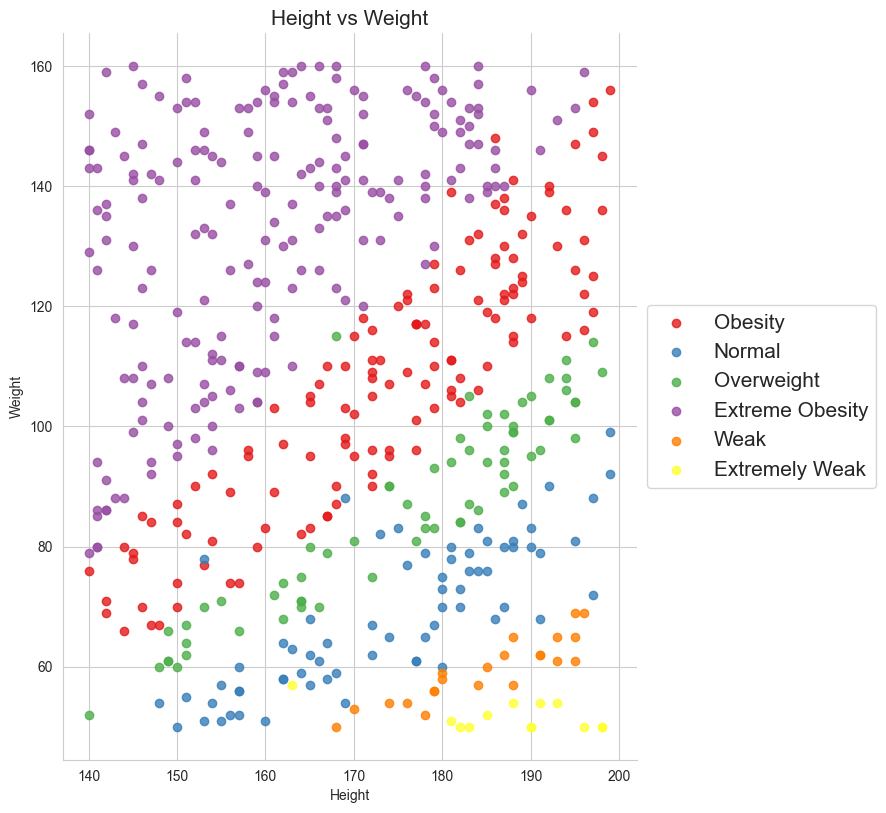

In [33]:
sns.set_style('whitegrid')
sns.lmplot(x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           height=8,   # Use 'height' instead of 'size'
           aspect=1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.show()



Text(0.5, 1.0, 'Height Vs Weight Data Grouped by Index')

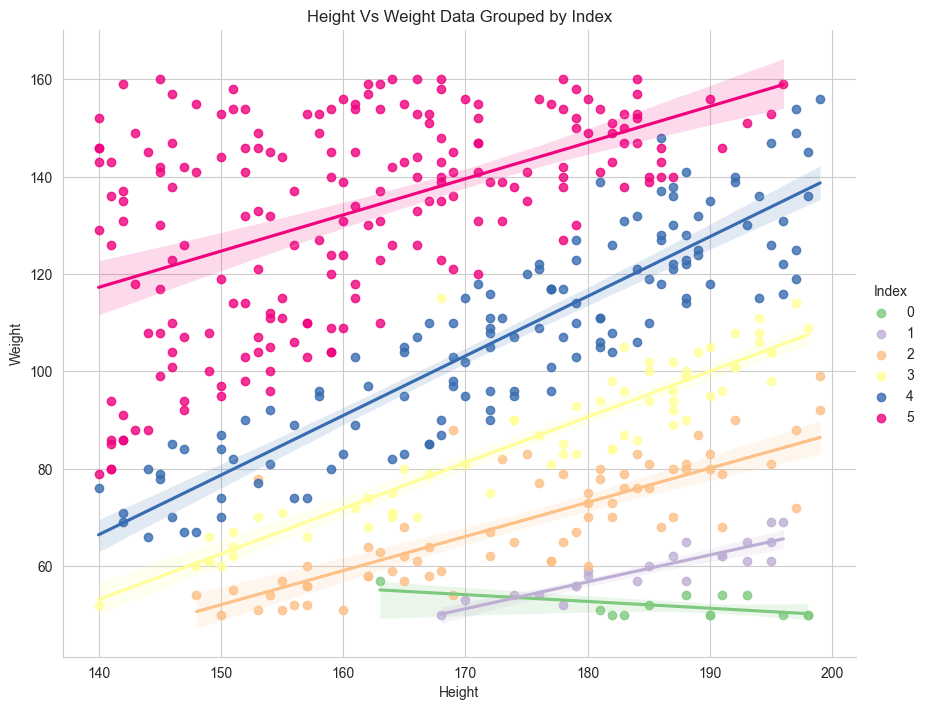

In [45]:
sns.lmplot(x='Height', y='Weight', hue='Index', data=data,
           fit_reg=True, height=7, aspect=1.25, palette='Accent')
ax = plt.gca()
ax.set_title("Height Vs Weight Data Grouped by Index")

<AxesSubplot: >

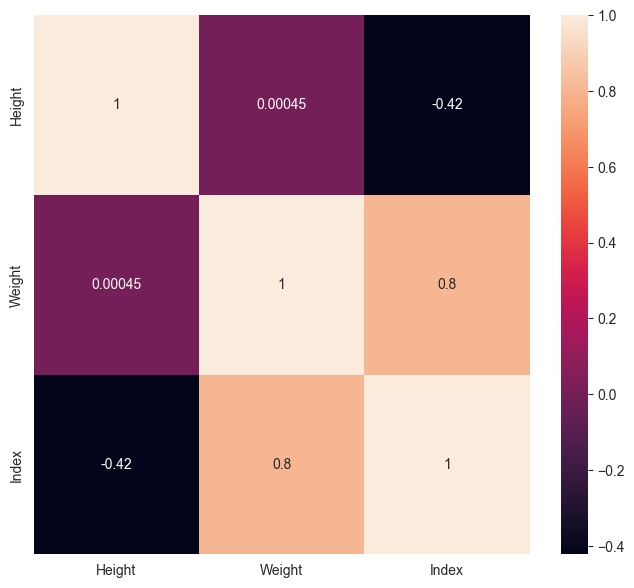

In [46]:
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

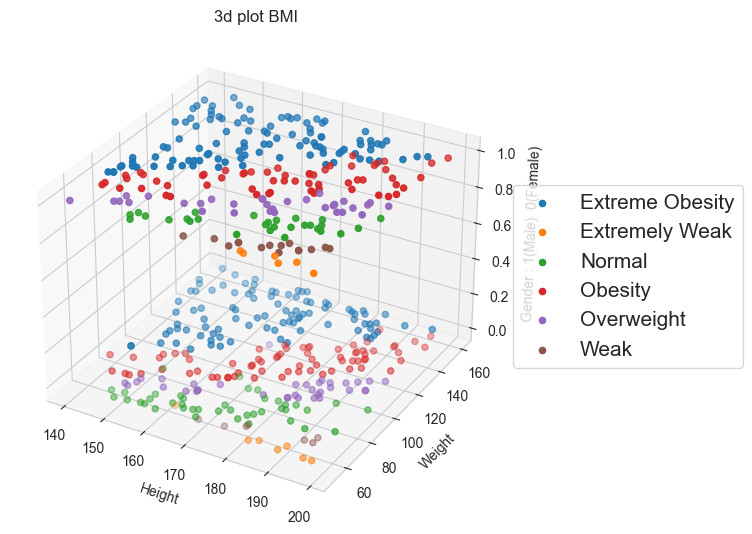

In [34]:
groups = data_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(data_visual['Height'],data_visual['Weight'] , data_visual['gender_lbl'], 
#            c=data_visual['Index'],
#            cmap=matplotlib.colors.ListedColormap(colors))


for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

Text(0.5, 1.0, 'Female Height Vs Weight Data Grouped by Index')

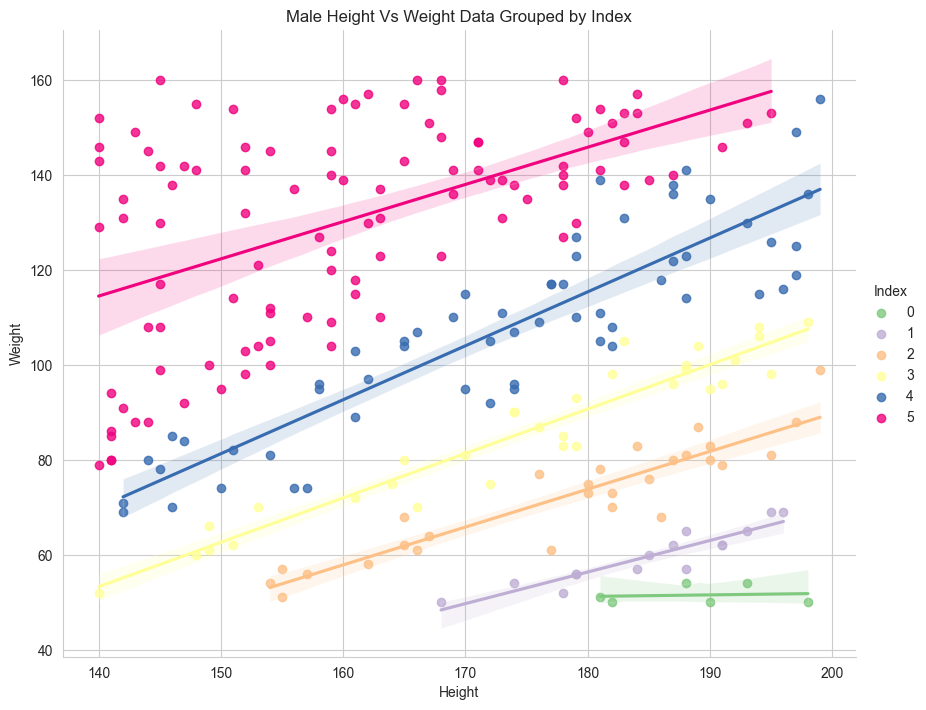

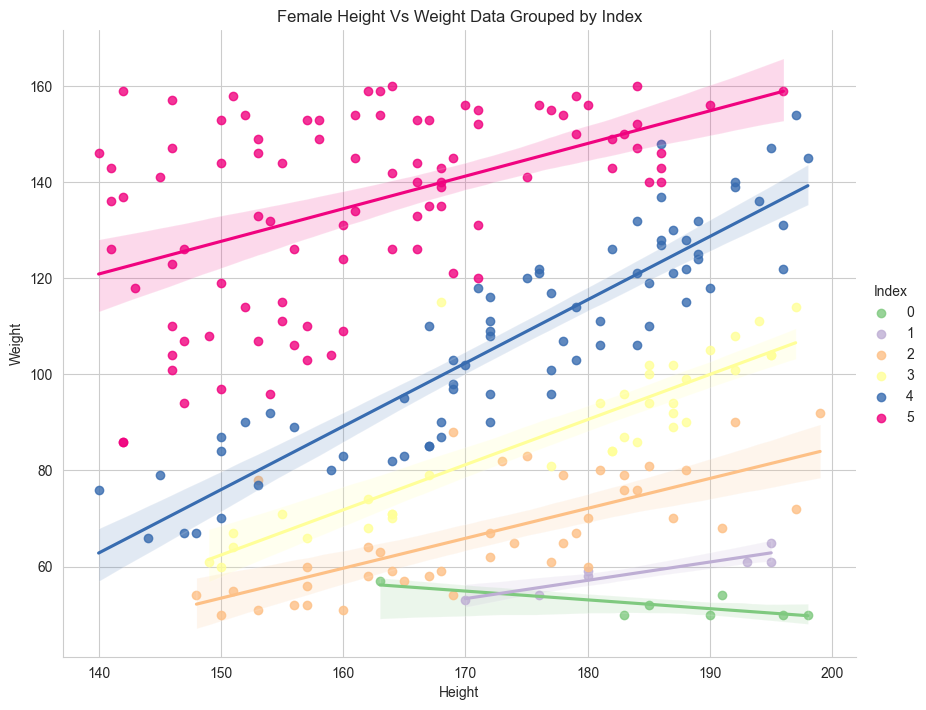

In [44]:
male_data = data[data['Gender']=='Male']
female_data = data[data['Gender']=='Female']
sns.lmplot(x='Height', y='Weight', hue='Index', data=male_data,
           fit_reg=True, height=7, aspect=1.25,palette='Accent')
ax = plt.gca()
ax.set_title("Male Height Vs Weight Data Grouped by Index")

sns.lmplot(x='Height', y='Weight', hue='Index', data=female_data,
           fit_reg=True, height=7, aspect=1.25,palette='Accent')
ax = plt.gca()
ax.set_title("Female Height Vs Weight Data Grouped by Index")

<AxesSubplot: >

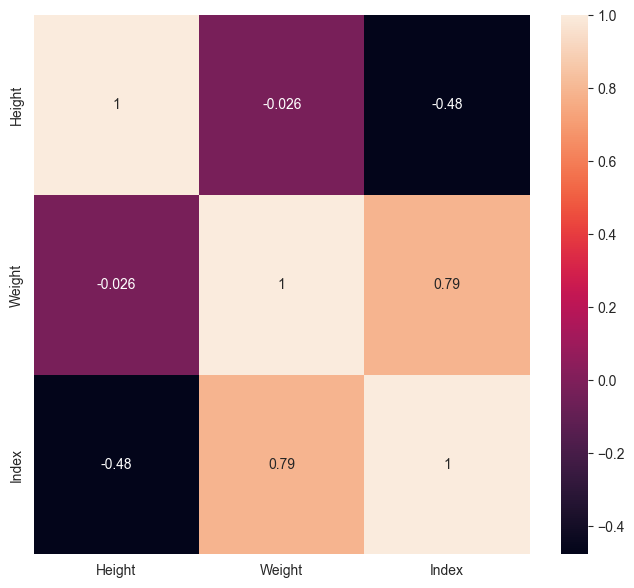

In [40]:
male_data = data[data['Gender']=='Male']
male_correlation_matrix = male_data.corr(numeric_only=True)
sns.heatmap(male_correlation_matrix, annot=True)

<AxesSubplot: >

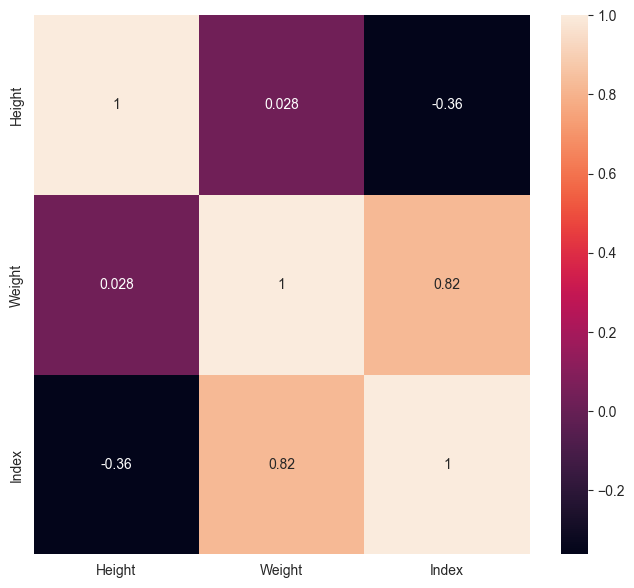

In [43]:
female_data = data[data['Gender']=='Female']
female_correlation_matrix = female_data.corr(numeric_only=True)
sns.heatmap(female_correlation_matrix, annot=True)

# Train the classifier

In [3]:
x = data['Height']
y = data['Weight']
z = data['Index']

In [4]:
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size=0.5, random_state=13)

In [5]:
model = LinearRegression()

In [6]:
model.fit(x_train.tolist(),y_train.tolist(),z_train.tolist())

## Trained data evaluation

In [7]:
prediction_of_train, prediction_integer_of_train = model.predict(x_train.tolist(),y_train.tolist())

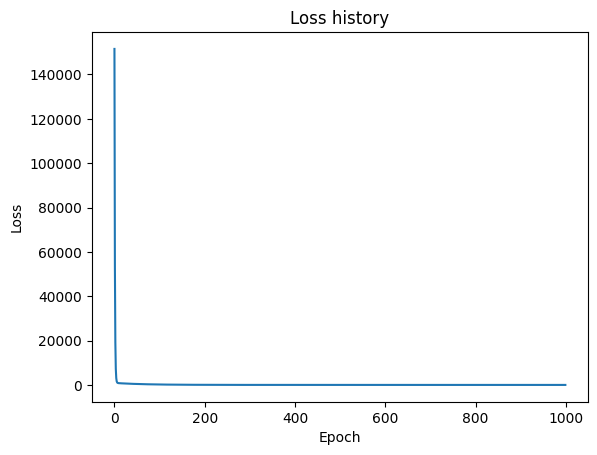

In [8]:
loss_history = model.error_history
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(loss_history)

plt.title("Loss history")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

### Zoom for first 10 epoch

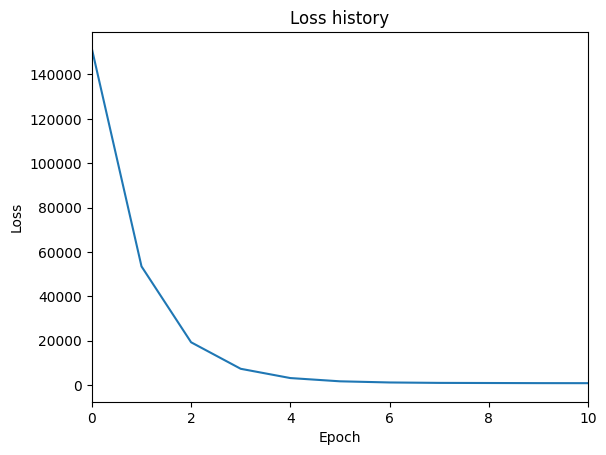

In [9]:
loss_history = model.error_history
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim(0, 10)

ax.plot(loss_history)

plt.title("Loss history")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [25]:
train_acc = model.accuracy(z_train.tolist(),prediction_integer_of_train)
print(train_acc)

0.476


In [24]:
train_rsquare = model.rsquared(z_train.tolist(),prediction_integer_of_train)
print(train_rsquare)

0.5150364103553695


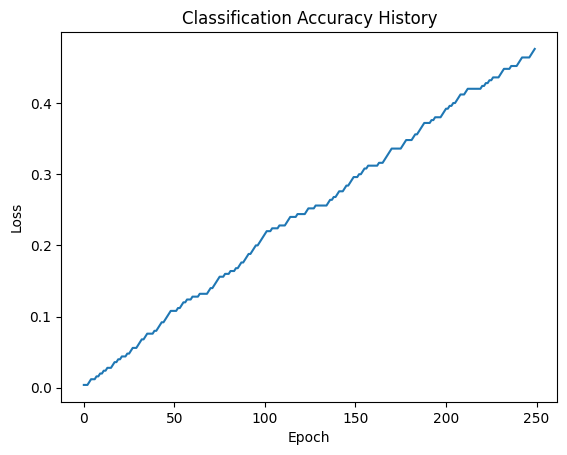

In [16]:
acc = model.accuracy_history
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(acc)

plt.title("Classification Accuracy History")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## Test data evaluation

In [17]:
prediction, prediction_integer = model.predict(x_test.tolist(),y_test.tolist())

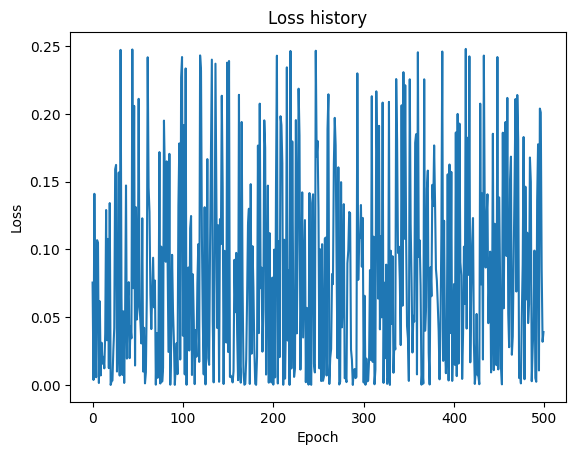

In [18]:
loss_history = model.test_error_history

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(loss_history)

plt.title("Loss history")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [22]:
test_acc = model.accuracy(z_test.tolist(),prediction_integer)
print(test_acc)

0.46


In [23]:
test_rsquare = model.rsquared(z_test.tolist(),prediction_integer)
print(test_rsquare)

0.6260950074781


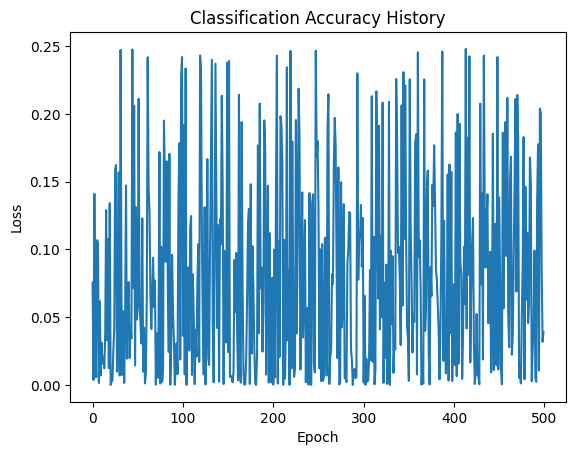

In [21]:
acc = model.accuracy_history
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(loss_history)

plt.title("Classification Accuracy History")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# YORUMLAMA

Yazmış olduğum lineer regresyon modelinin çıktılarına bakınca modelin overfitlemediğini, hatta test verisinde daha iyi çalıştığını söyleyebilirim. Modelin çalışmasının iyi ama çok iyi olmamasının sebebi verilerin %50'si ile eğitmiş olmamdan dolayı olabilir. Başka bir sebep olarak regresyon sonuçlarını en yakın tam sayıya yuvarlayıp classification probleme benzettiğim bu çıktılarda, sayının diğer kısma yuvarlanması da modelin classifcation anlamında iyi çalışmamasına neden oldu. Çıktılara baktığımda en yakın 2 tamsayıdan yanlış olanın çokça seçildiğini farkettim (3.4 olan sayı 3'e yuvarlanıyor fakat gerçek değeri 4). Dolayısıyla modelin daha iyi öğrenmesiyle de bu problemin üstesinden gelinerek classification çıktıları daha güvenilir olabilir. Train edilirkenki loss ve accuracy değerlerinin grafikleştirilmesi, model kendini geliştirdiği için anlamlı bir çıktı ifade ederken; test verilerinden elde ettiğim grafikler anlamlı bir çıktı ifade etmedi. Bu modelin daha iyi çalışması için gender değişkenini kullanmakta etkili olabilir.